In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
print(dataset.shape)
print(dataset.head)

(5572, 5)
<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN   

In [ ]:
dataset = dataset.drop(columns='Unnamed: 2')
dataset = dataset.drop(columns='Unnamed: 3')
dataset = dataset.drop(columns='Unnamed: 4')

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [ ]:
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["message"])

In [ ]:
dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
y = dataset['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)

[0 1 0 ... 0 1 0]


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[1174   22]
 [   9  188]]


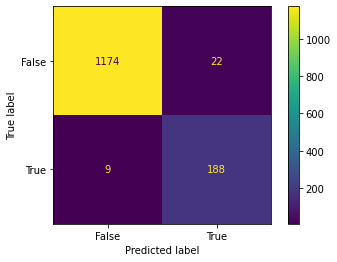

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9777458722182341


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9679600359913757


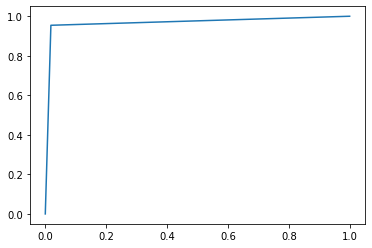

In [ ]:
plt.plot(false_positive_rate,true_positive_rate)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1196
           1       0.90      0.95      0.92       197

    accuracy                           0.98      1393
   macro avg       0.94      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
from sklearn.svm import SVC
svc_model = SVC() 
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 1 0 ... 0 1 0]


In [ ]:
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[1195    1]
 [  40  157]]


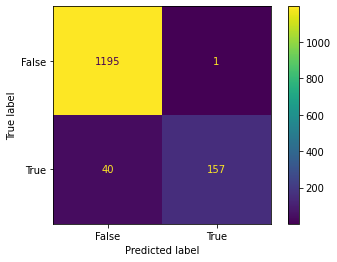

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9705671213208902


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.8980590971597371


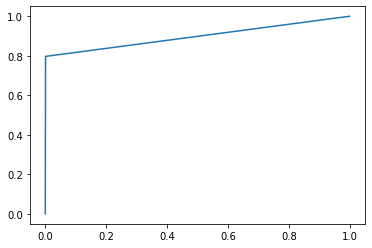

In [ ]:
plt.plot(false_positive_rate,true_positive_rate)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1196
           1       0.99      0.80      0.88       197

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

